In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [8]:
import os
import pandas as pd
import glob

# List all files in the dataset folder
print(os.listdir("/kaggle/input/hormones-and-temperature"))



# Use glob to match the CSV file automatically

files = glob.glob("/kaggle/input/hormones-and-temperature/*.csv")
print("Found CSV files:", files)

# Load the first CSV found
df = pd.read_csv(files[0])
raw = df.copy()

df.head()


['hormones and temperature .csv']
Found CSV files: ['/kaggle/input/hormones-and-temperature/hormones and temperature .csv']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,study_interval,is_weekend,day_in_study,phase,lh,estrogen,pdg,flow_volume,flow_color,...,sleep_start_timestamp,sleep_end_day_in_study,sleep_end_timestamp,temperature_samples,nightly_temperature,type,baseline_relative_sample_sum,baseline_relative_sample_sum_of_squares,baseline_relative_nightly_standard_deviation,baseline_relative_sample_standard_deviation
0,1,2022,True,1,Follicular,2.9,94.2,NaN,Not at all,Not at all,...,0:08:00,1.0,10:25:30,414.0,34.616087,SKIN,NaN,NaN,NaN,NaN
1,1,2022,False,2,Follicular,1.2,226.3,NaN,Not at all,Not at all,...,23:54:00,2.0,7:10:00,258.0,33.780659,SKIN,NaN,NaN,NaN,NaN
2,1,2022,False,3,Follicular,3.5,276.8,NaN,Not at all,Not at all,...,0:14:00,3.0,9:04:00,353.0,34.634929,SKIN,6.651304,1554.843599,0.487865,2.101622
3,1,2022,False,4,Fertility,1.8,322.1,NaN,Not at all,Not at all,...,0:12:30,4.0,7:42:00,446.0,34.050056,SKIN,-126.224891,1161.909368,0.424570,1.839029
4,1,2022,False,5,Fertility,4.6,244.9,NaN,Not at all,Not at all,...,0:22:00,6.0,6:38:00,269.0,34.223197,SKIN,0.000000,766.896151,0.368295,1.803428


In [3]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Display the first few rows
df.head()

Dataset Shape: 5659 rows, 33 columns


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,study_interval,is_weekend,day_in_study,phase,lh,estrogen,pdg,flow_volume,flow_color,...,sleep_start_timestamp,sleep_end_day_in_study,sleep_end_timestamp,temperature_samples,nightly_temperature,type,baseline_relative_sample_sum,baseline_relative_sample_sum_of_squares,baseline_relative_nightly_standard_deviation,baseline_relative_sample_standard_deviation
0,1,2022,True,1,Follicular,2.9,94.2,NaN,Not at all,Not at all,...,0:08:00,1.0,10:25:30,414.0,34.616087,SKIN,NaN,NaN,NaN,NaN
1,1,2022,False,2,Follicular,1.2,226.3,NaN,Not at all,Not at all,...,23:54:00,2.0,7:10:00,258.0,33.780659,SKIN,NaN,NaN,NaN,NaN
2,1,2022,False,3,Follicular,3.5,276.8,NaN,Not at all,Not at all,...,0:14:00,3.0,9:04:00,353.0,34.634929,SKIN,6.651304,1554.843599,0.487865,2.101622
3,1,2022,False,4,Fertility,1.8,322.1,NaN,Not at all,Not at all,...,0:12:30,4.0,7:42:00,446.0,34.050056,SKIN,-126.224891,1161.909368,0.424570,1.839029
4,1,2022,False,5,Fertility,4.6,244.9,NaN,Not at all,Not at all,...,0:22:00,6.0,6:38:00,269.0,34.223197,SKIN,0.000000,766.896151,0.368295,1.803428


In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5659 non-null   int64  
 1   study_interval                                5659 non-null   int64  
 2   is_weekend                                    5659 non-null   bool   
 3   day_in_study                                  5659 non-null   int64  
 4   phase                                         5658 non-null   object 
 5   lh                                            5339 non-null   float64
 6   estrogen                                      5338 non-null   float64
 7   pdg                                           1864 non-null   float64
 8   flow_volume                                   3189 non-null   object 
 9   flow_color                                    3194 non-null   o

In [5]:
# Calculate missing values per column and sort them
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

# Display columns with missing values
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
pdg,3795,67.061318
flow_volume,2470,43.647288
flow_color,2465,43.558933
moodswing,2339,41.332391
indigestion,2334,41.244036
stress,2332,41.208694
cramps,2332,41.208694
sorebreasts,2332,41.208694
foodcravings,2332,41.208694
bloating,2331,41.191023


In [6]:
# Describe numerical features
df[['lh', 'estrogen', 'nightly_temperature', 'temperature_samples']].describe()

,lh,estrogen,nightly_temperature,temperature_samples
count,5339.000000,5338.000000,5575.000000,5575.000000
mean,6.332609,128.987748,33.744131,458.564305
std,7.888081,101.859259,0.943980,114.523649
min,0.000000,0.000000,25.699286,2.000000
25%,2.800000,67.100000,33.203493,383.000000
50%,4.400000,100.050000,33.854962,462.000000
75%,6.900000,155.400000,34.386865,530.000000
max,185.600000,640.000000,36.430874,1097.000000


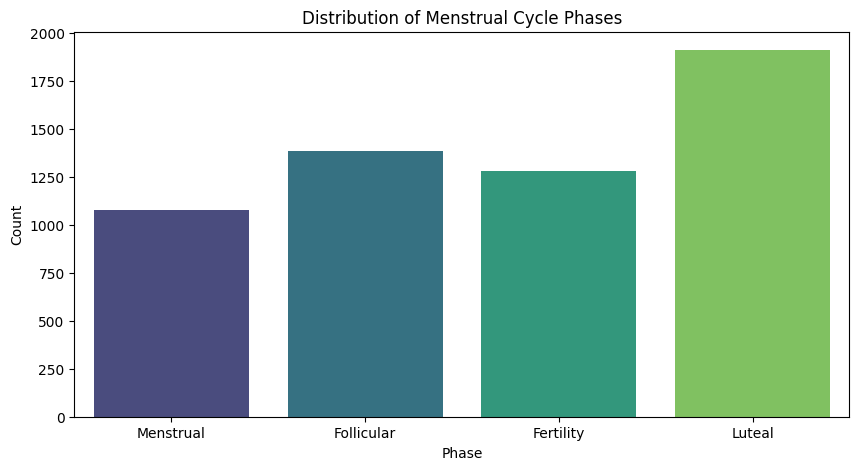

In [11]:
# Plot the distribution of the target variable 'phase'
plt.figure(figsize=(10, 5))
phase_order = ['Menstrual', 'Follicular', 'Fertility', 'Luteal']
sns.countplot(data=df, x='phase', order=phase_order, palette='viridis')
plt.title('Distribution of Menstrual Cycle Phases')
plt.xlabel('Phase')
plt.ylabel('Count')
plt.show()

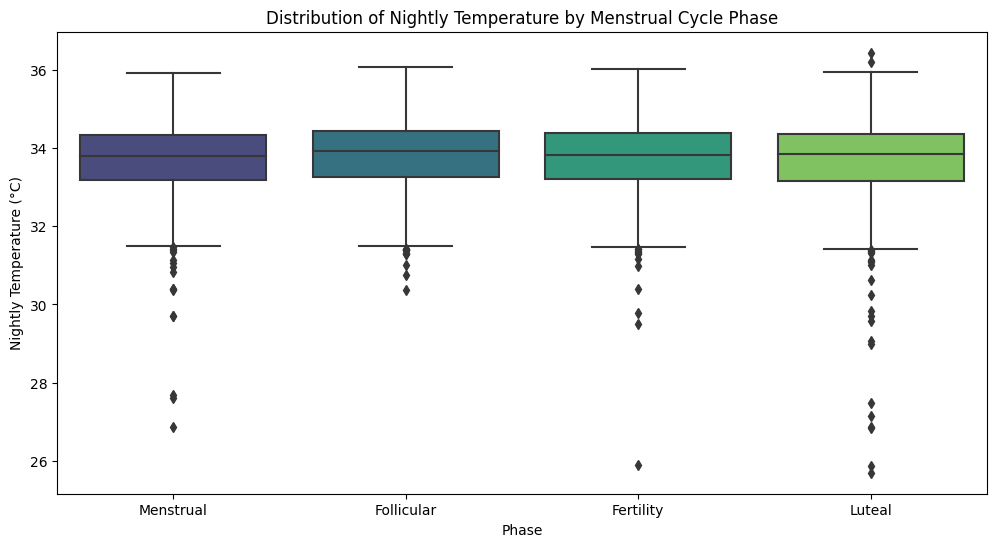

In [12]:
# Plot nightly temperature distribution by phase
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='phase', y='nightly_temperature', order=phase_order, palette='viridis')
plt.title('Distribution of Nightly Temperature by Menstrual Cycle Phase')
plt.xlabel('Phase')
plt.ylabel('Nightly Temperature (°C)')
plt.show()

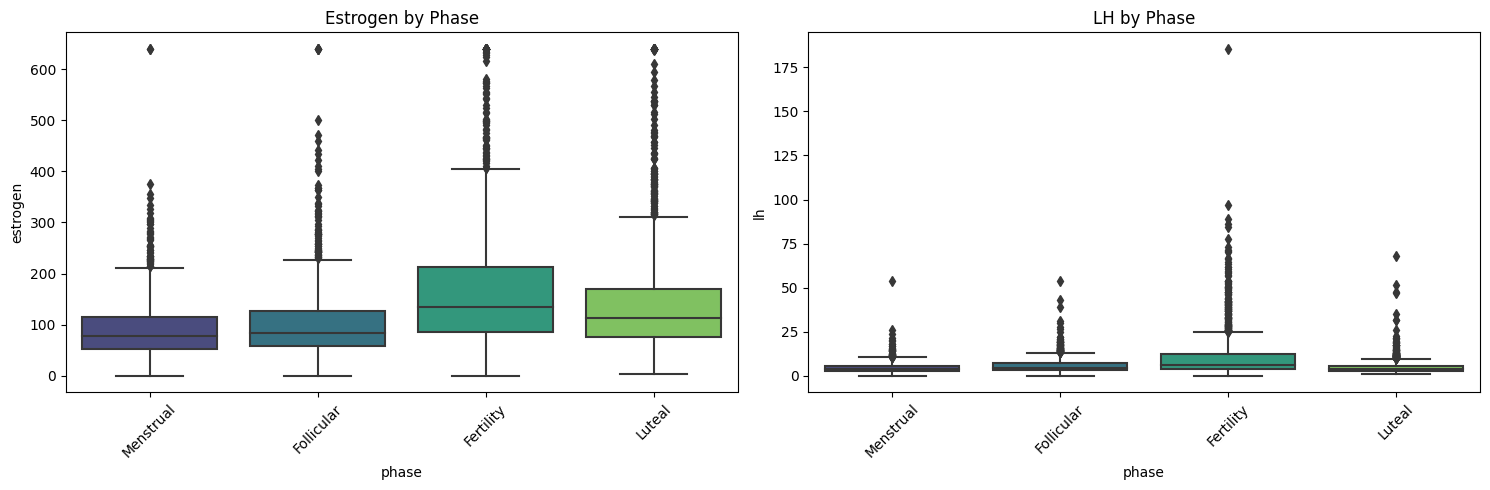

In [13]:
# Plot hormone levels by phase
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Estrogen
sns.boxplot(data=df, x='phase', y='estrogen', order=phase_order, ax=ax1, palette='viridis')
ax1.set_title('Estrogen by Phase')
ax1.tick_params(axis='x', rotation=45)

# LH
sns.boxplot(data=df, x='phase', y='lh', order=phase_order, ax=ax2, palette='viridis')
ax2.set_title('LH by Phase')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


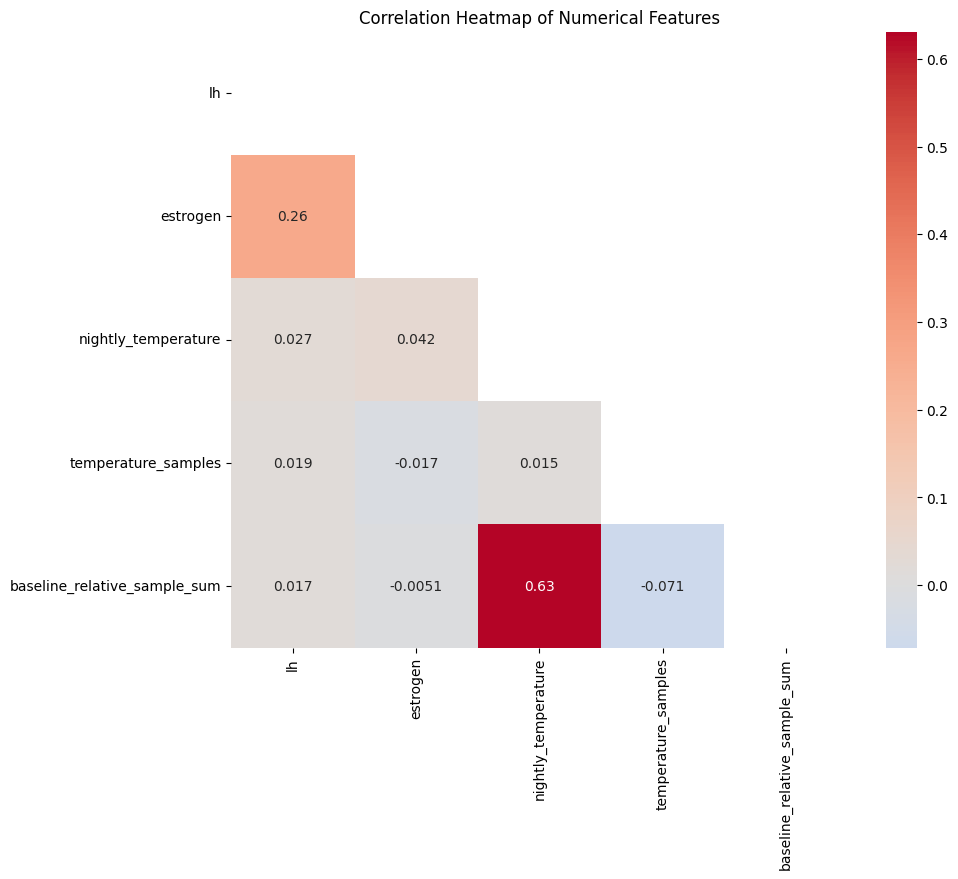

In [14]:
# Select key numerical features for correlation
numerical_features = ['lh', 'estrogen', 'nightly_temperature', 'temperature_samples', 'baseline_relative_sample_sum']
# Filter to only include features that exist and have enough data
corr_df = df[numerical_features].copy()
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

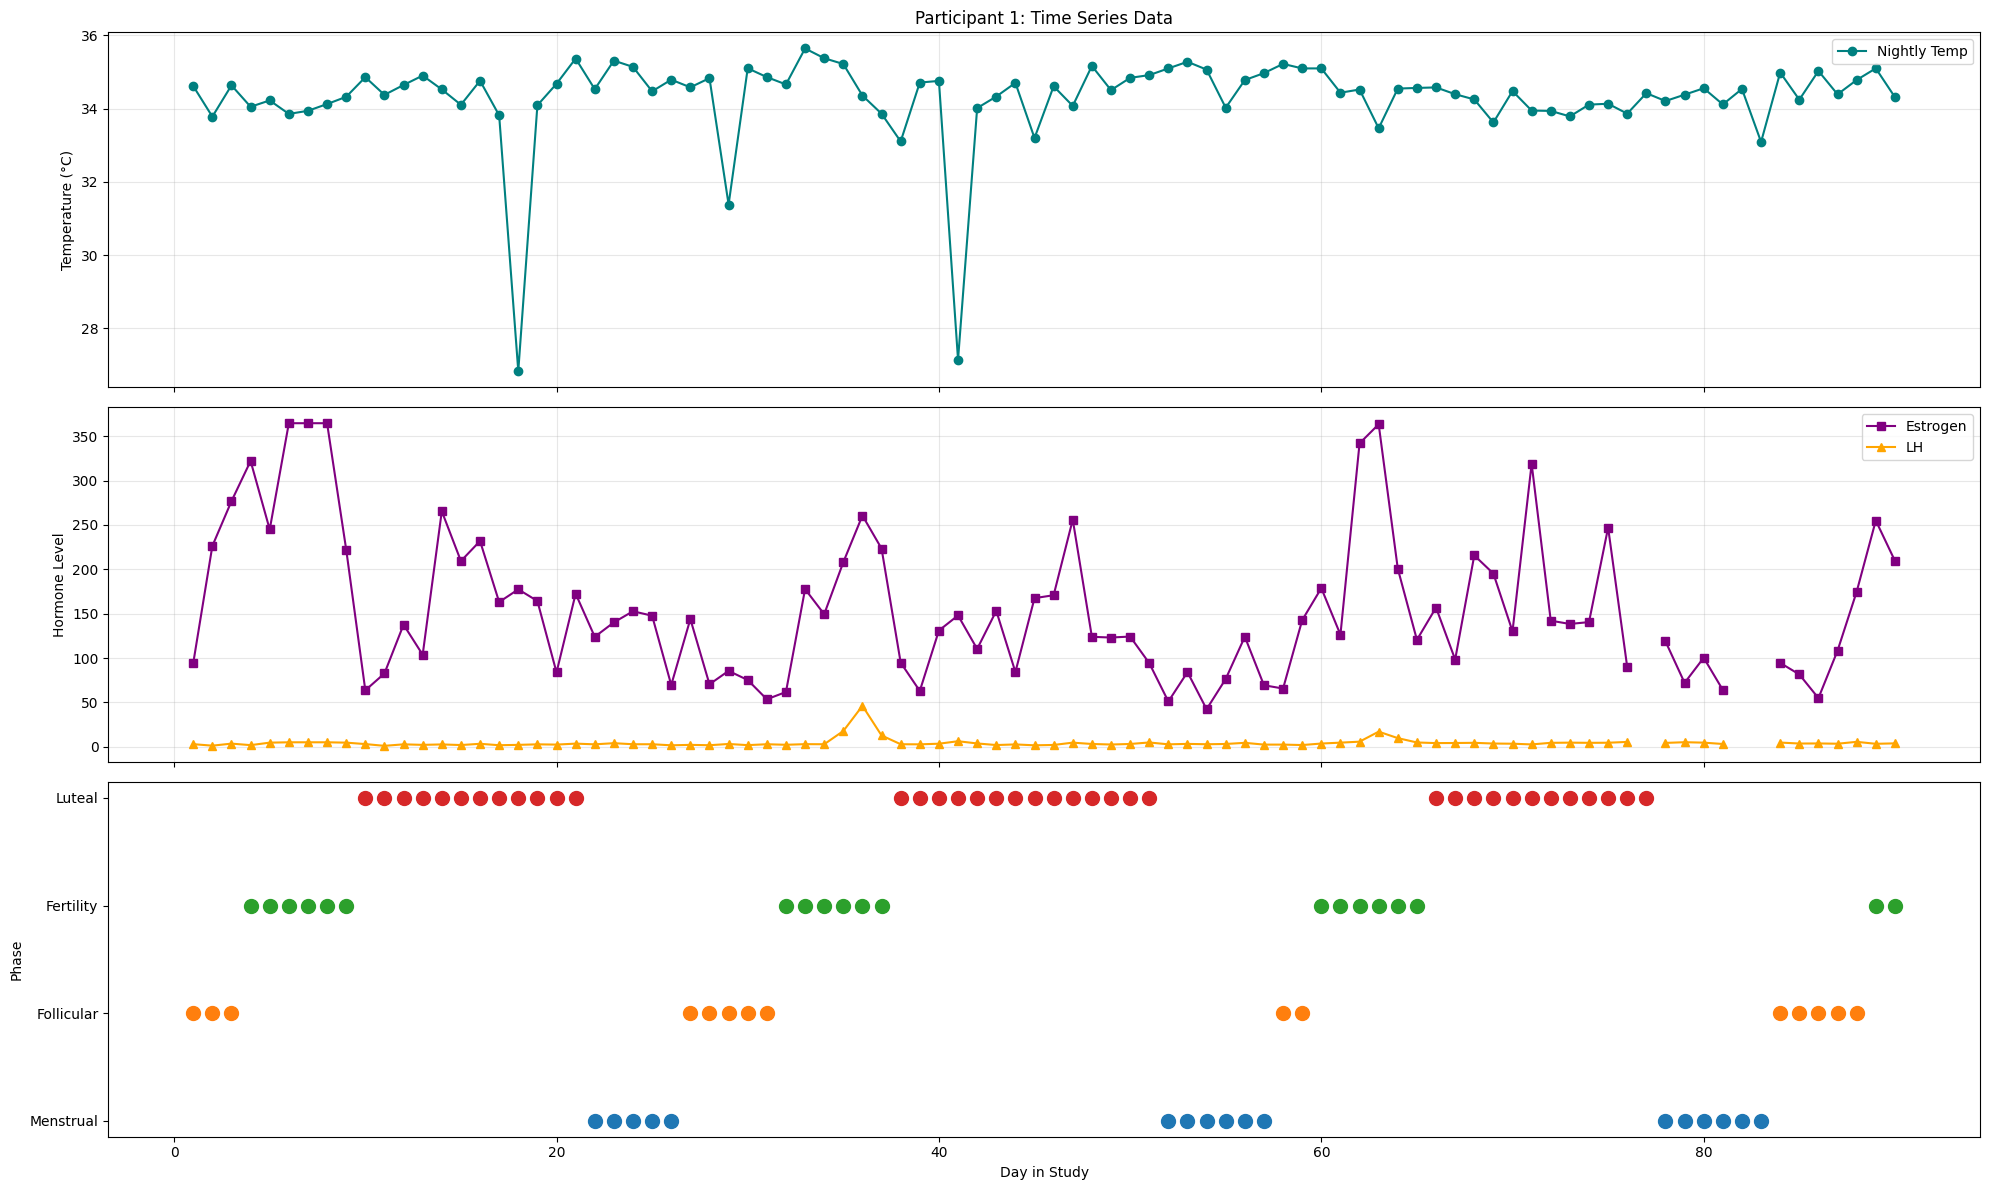

In [15]:
# Filter for one participant
participant_df = df[df['id'] == 1].sort_values('day_in_study')

# Create a plot with time on the x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 12), sharex=True)

# Plot 1: Temperature
ax1.plot(participant_df['day_in_study'], participant_df['nightly_temperature'], marker='o', linestyle='-', color='teal', label='Nightly Temp')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Participant 1: Time Series Data')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Hormones
ax2.plot(participant_df['day_in_study'], participant_df['estrogen'], marker='s', linestyle='-', color='purple', label='Estrogen')
ax2.plot(participant_df['day_in_study'], participant_df['lh'], marker='^', linestyle='-', color='orange', label='LH')
ax2.set_ylabel('Hormone Level')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Phase (as a categorical plot)
for phase in phase_order:
    phase_data = participant_df[participant_df['phase'] == phase]
    ax3.scatter(phase_data['day_in_study'], [phase] * len(phase_data), label=phase, s=100)
ax3.set_xlabel('Day in Study')
ax3.set_ylabel('Phase')
ax3.set_yticks(phase_order)

plt.tight_layout()
plt.show()

In [12]:
# Specify the columns to check for missing values
columns_to_check = ['lh','flow_volume', 'fatigue', 'temperature_samples']  
# Drop rows where any of these columns have missing values
df_cleaned = df.dropna(subset=columns_to_check)

# Reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# Optional: keep a copy
raw = df_cleaned.copy()

# Check the result
print(f"Rows after dropping missing values in specified columns: {df_cleaned.shape[0]}")
df_cleaned.head()


Rows after dropping missing values in specified columns: 2937


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,study_interval,is_weekend,day_in_study,phase,lh,estrogen,pdg,flow_volume,flow_color,...,sleep_start_timestamp,sleep_end_day_in_study,sleep_end_timestamp,temperature_samples,nightly_temperature,type,baseline_relative_sample_sum,baseline_relative_sample_sum_of_squares,baseline_relative_nightly_standard_deviation,baseline_relative_sample_standard_deviation
0,1,2022,True,1,Follicular,2.9,94.2,NaN,Not at all,Not at all,...,0:08:00,1.0,10:25:30,414.0,34.616087,SKIN,NaN,NaN,NaN,NaN
1,1,2022,False,2,Follicular,1.2,226.3,NaN,Not at all,Not at all,...,23:54:00,2.0,7:10:00,258.0,33.780659,SKIN,NaN,NaN,NaN,NaN
2,1,2022,False,3,Follicular,3.5,276.8,NaN,Not at all,Not at all,...,0:14:00,3.0,9:04:00,353.0,34.634929,SKIN,6.651304,1554.843599,0.487865,2.101622
3,1,2022,False,4,Fertility,1.8,322.1,NaN,Not at all,Not at all,...,0:12:30,4.0,7:42:00,446.0,34.050056,SKIN,-126.224891,1161.909368,0.424570,1.839029
4,1,2022,False,5,Fertility,4.6,244.9,NaN,Not at all,Not at all,...,0:22:00,6.0,6:38:00,269.0,34.223197,SKIN,0.000000,766.896151,0.368295,1.803428


In [14]:
# Save the cleaned dataset
CLEANED_FILE = '/kaggle/working/hormones_and_temperature_cleaned.csv'

df_cleaned.to_csv(CLEANED_FILE, index=False)
print(f"Cleaned dataset saved to: {CLEANED_FILE}")


Cleaned dataset saved to: /kaggle/working/hormones_and_temperature_cleaned.csv
